In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#TUGAS 5 Zenobia Wirandi Zenaide 24060121140164

pertama kita mengimport library librar yang dibutuhkna dalam pembuatan visualisasi proyeksi pca 2D

In [ ]:
path = 'tae.data'
column_names = ['EnglishSpeaker','CourseInstructor','Course','SummerOrRegular','ClassSize','ClassAttribute']
dataset = pd.read_csv(path, names=column_names)

kemudian kita mendeklrasaikan dataset yang ingin kita gunakan, pada kasus ini adalah mengenai kelas, dan kita set pathnya juga

In [ ]:
dataset.head(15)

,EnglishSpeaker,CourseInstructor,Course,SummerOrRegular,ClassSize,ClassAttribute
0,1,23,3,1,19,3
1,2,15,3,1,17,3
2,1,23,3,2,49,3
3,1,5,2,2,33,3
4,2,7,11,2,55,3
5,2,23,3,1,20,3
6,2,9,5,2,19,3
7,2,10,3,2,27,3
8,1,22,3,1,58,3
9,2,15,3,1,20,3


In [ ]:
kemudian kita mengecek data 15 pertama yang ada dalam dataset tersebut

In [ ]:
dataset.groupby('ClassAttribute').size()

ClassAttribute
1    49
2    50
3    52
dtype: int64


Kode dataset.groupby('ClassAttribute').size() digunakan untuk mengelompokkan data dalam suatu DataFrame berdasarkan nilai pada kolom 'ClassAttribute' dan kemudian menghitung jumlah elemen dalam setiap kelompok. Mari kita jabarkan bagian-bagian dari kode ini:

In [ ]:
X = dataset.iloc[:,1:12]
Y = dataset.iloc[:,5]

X.head()

,CourseInstructor,Course,SummerOrRegular,ClassSize,ClassAttribute
0,23,3,1,19,3
1,15,3,1,17,3
2,23,3,2,49,3
3,5,2,2,33,3
4,7,11,2,55,3



Dalam kode tersebut, X diinisialisasi dengan data dari kolom kedua hingga kesebelas dari DataFrame dataset, sedangkan Y diinisialisasi dengan data dari kolom keenam. Menggunakan .head() pada X menampilkan beberapa baris pertama dari data yang telah diambil. Jadi, X akan menjadi subset dari fitur-fitur yang digunakan untuk analisis atau pemodelan, dan Y akan berisi target atau label yang ingin diprediksi. Pemilihan kolom-kolom tertentu ini dapat disesuaikan tergantung pada kebutuhan analisis atau model yang sedang dibangun, dan pemahaman terhadap data tersebut memainkan peran penting dalam pengambilan keputusan ini.

In [ ]:
features = ['EnglishSpeaker','CourseInstructor','Course','SummerOrRegular','ClassSize','ClassAttribute']

X = dataset.loc[:, features].values
Y = dataset.loc[:,['ClassAttribute']].values
X = StandardScaler().fit_transform(X)


Dalam kode tersebut, fitur-fitur yang ingin digunakan (seperti 'EnglishSpeaker', 'CourseInstructor', dll.) dipilih dari DataFrame dataset. Selanjutnya, data dari fitur-fitur tersebut dinormalisasi menggunakan StandardScaler dari scikit-learn. Ini membantu memastikan bahwa semua fitur memiliki skala yang seragam, yang dapat meningkatkan kinerja algoritma pembelajaran mesin. Variabel X menyimpan fitur-fitur yang telah dinormalisasi, dan variabel Y menyimpan target atau label yang ingin diprediksi.

In [ ]:
pca = PCA(n_components=2)
Principal_Components = pca.fit_transform(X)
data = Principal_Components
principalDF = pd.DataFrame(data, columns = ['principal component 1', 'principal component 2'])


Dalam blok kode tersebut, dilakukan reduksi dimensi menggunakan Principal Component Analysis (PCA) dengan dua komponen utama. PCA diterapkan pada data yang telah dinormalisasi (X), dan hasilnya disimpan dalam variabel Principal_Components. Data tersebut kemudian diubah menjadi DataFrame baru (principalDF) dengan dua kolom, yaitu 'principal component 1' dan 'principal component 2'. Ini memungkinkan representasi data dalam ruang dua dimensi yang lebih ringkas untuk analisis atau visualisasi lebih lanjut.

In [ ]:
finalDf = pd.concat([principalDF, dataset[['ClassAttribute']]], axis = 1)


Dalam blok kode tersebut, DataFrame principalDF yang berisi dua komponen utama hasil dari PCA digabungkan dengan kolom 'ClassAttribute' dari DataFrame dataset. Hasil penggabungan disimpan dalam DataFrame baru yang dinamai finalDf. Sekarang, finalDf berisi informasi hasil reduksi dimensi (dari PCA) dan kolom kelas ('ClassAttribute') dari dataset asli. DataFrame ini dapat digunakan untuk analisis atau visualisasi lebih lanjut.

In [ ]:
finalDf.head()

,principal component 1,principal component 2,ClassAttribute
0,3.678692,-0.410359,3
1,1.937682,-1.469156,3
2,1.860026,1.900478,3
3,0.877559,0.443587,3
4,-0.863447,0.352413,3


## Proyeksi dalam bentuk 2D

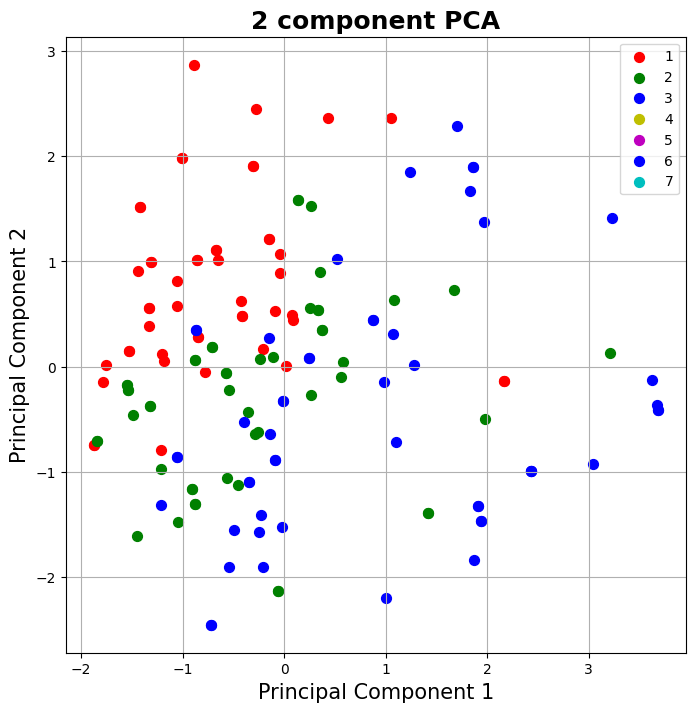

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 18, fontdict={'weight':'bold'})

targets = [1, 2, 3, 4, 5, 6, 7]
colors = ['r', 'g', 'b', 'y', 'm','b', 'c']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['ClassAttribute'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()


Kode di atas menggunakan matplotlib untuk membuat scatter plot dari data yang telah direduksi dimensinya menggunakan PCA. Figur dan subplot dibuat dengan label sumbu x dan y. Tujuh kelas target diwakili oleh warna yang berbeda dalam scatter plot. Setiap titik pada plot merupakan representasi dua komponen utama hasil PCA. Legenda ditambahkan untuk mencantumkan kelas target, dan grid juga diterapkan. Hasilnya adalah visualisasi yang kompak dari sebaran data dalam dua dimensi setelah reduksi dimensi menggunakan PCA.

In [ ]:
#varians

print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))


Kode pertama (print(pca.explained_variance_ratio_)) digunakan untuk menampilkan rasio varians yang dijelaskan oleh setiap komponen utama dalam analisis komponen utama (PCA). Ini memberikan informasi tentang seberapa penting setiap komponen dalam menjelaskan variasi dalam data.

Kode kedua (print(sum(pca.explained_variance_ratio_))) menghitung dan menampilkan total rasio varians yang dijelaskan oleh semua komponen utama. Total ini memberikan gambaran tentang seberapa besar proporsi varians yang telah dipertahankan dalam reduksi dimensi menggunakan PCA.